EXPLORATORY DATA ANALYSIS

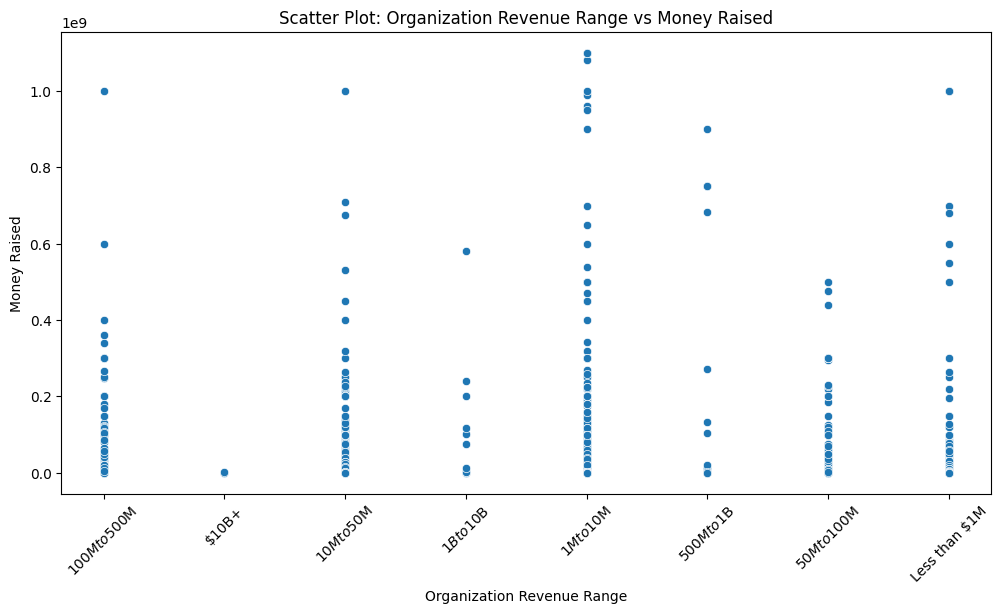

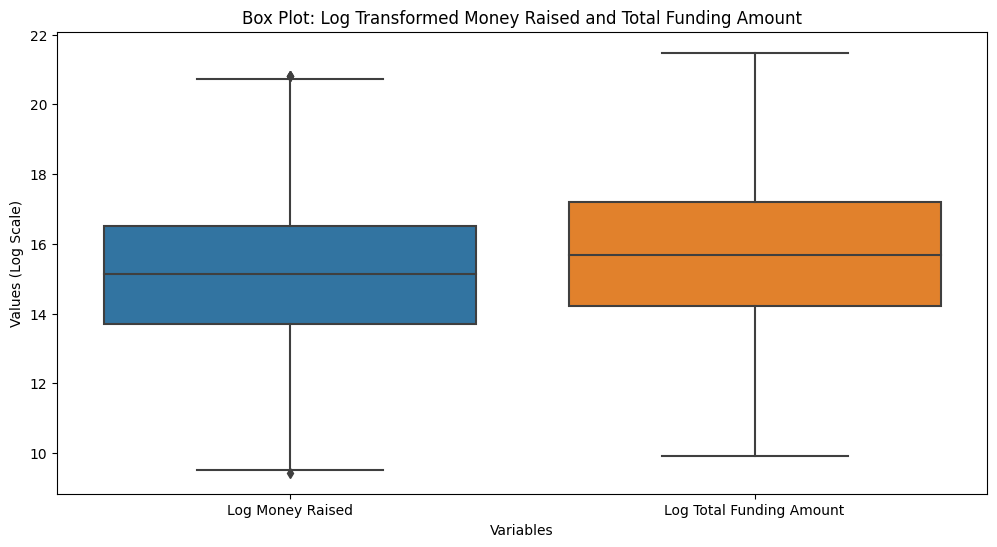

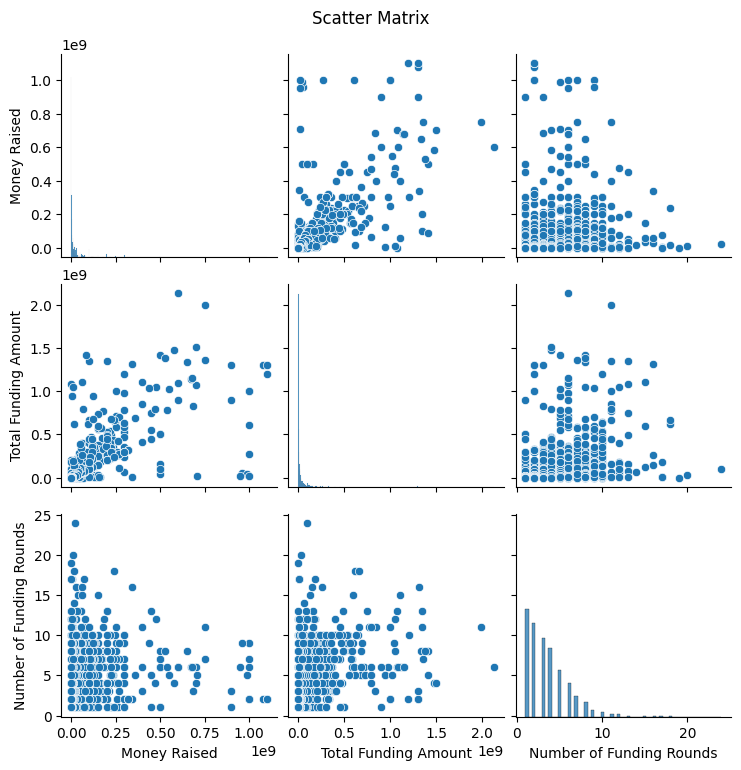

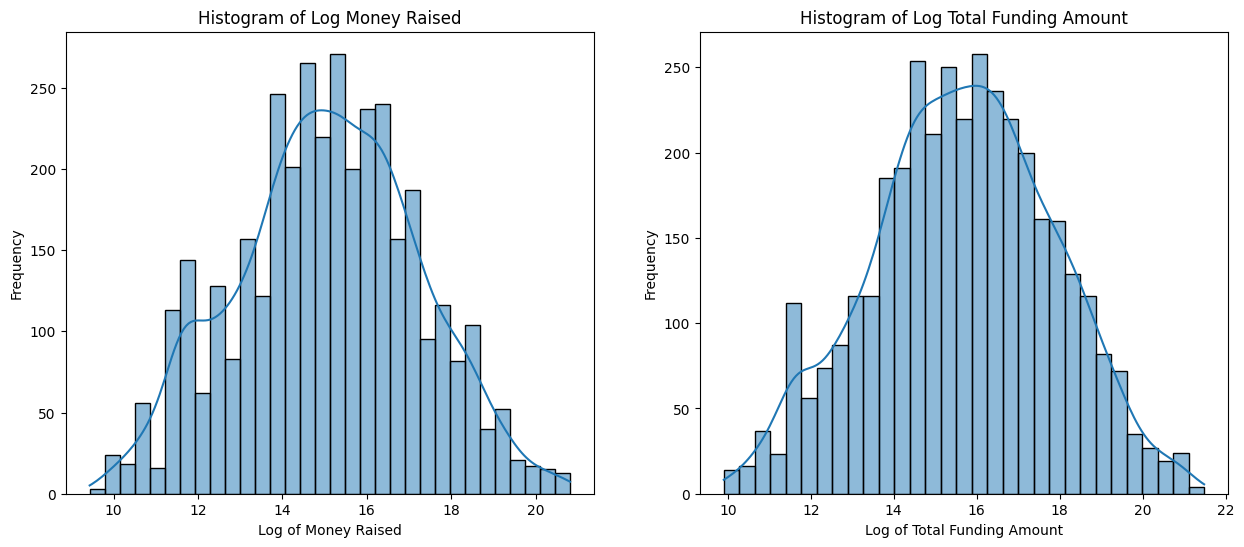

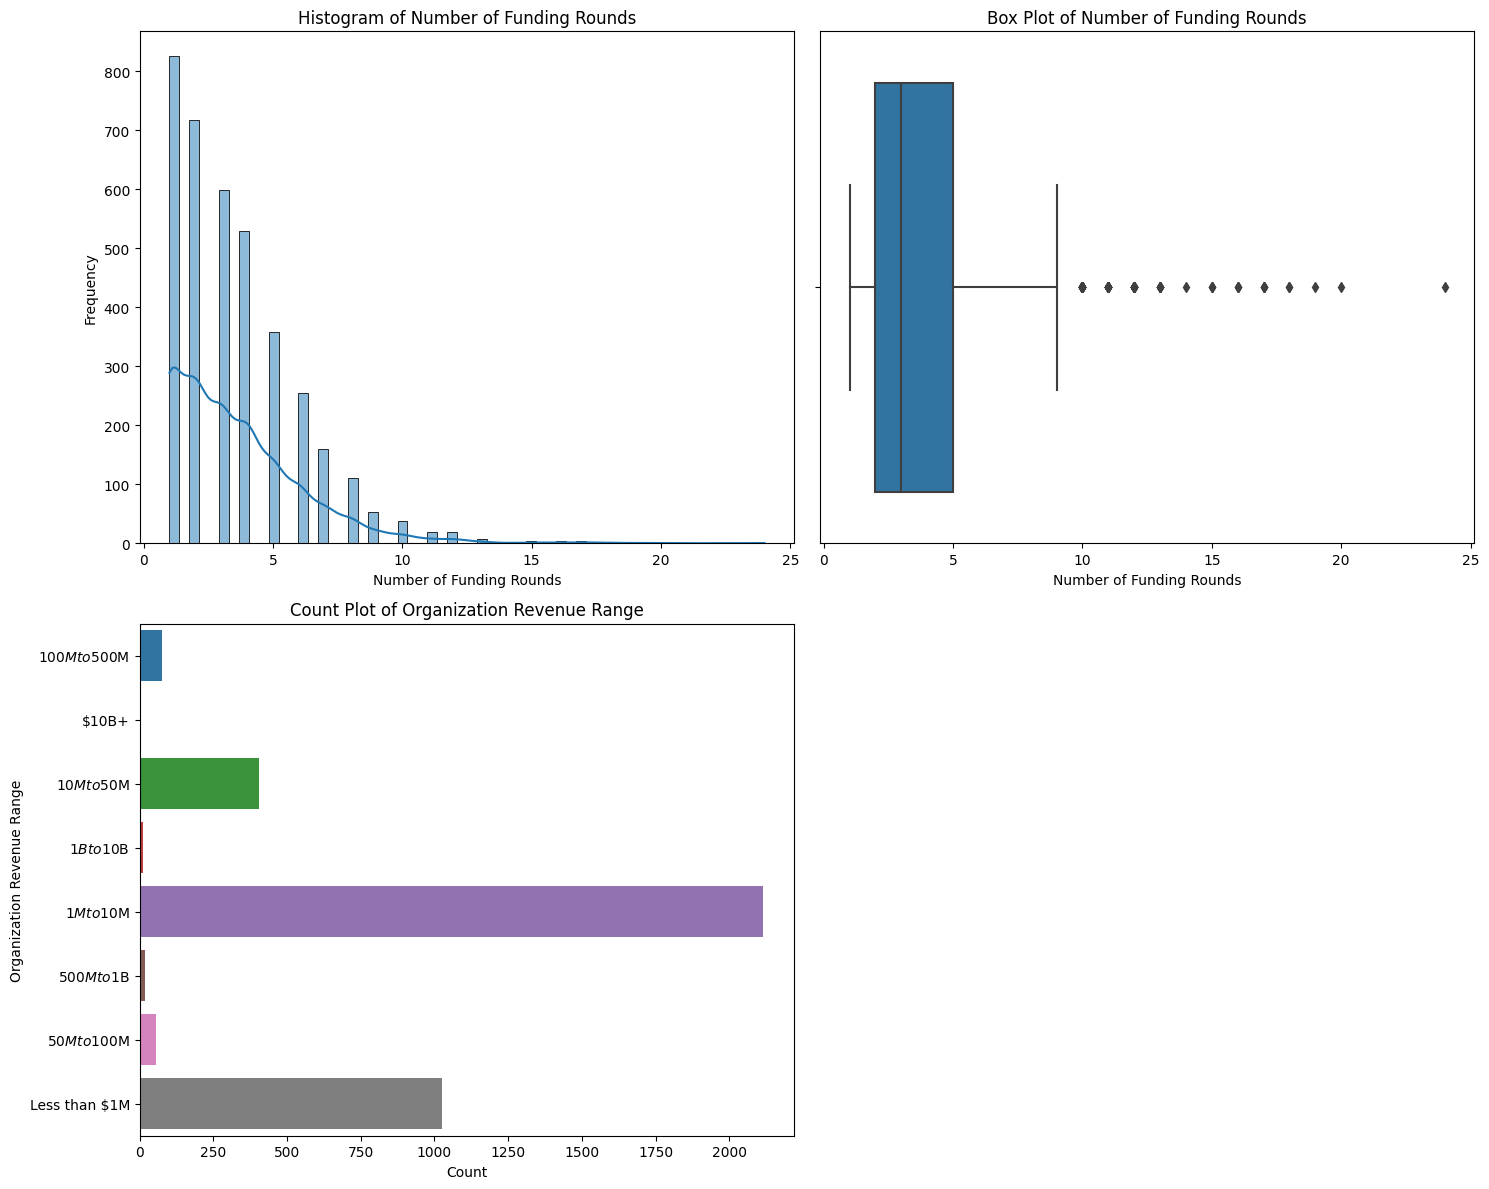

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Cleaning and Transformation
# Converting 'Organization Revenue Range' to a categorical type for plotting
data['Organization Revenue Range'] = pd.Categorical(data['Organization Revenue Range'])

# Log Transformation for 'Money Raised' and 'Total Funding Amount'
data['Log Money Raised'] = np.log(data['Money Raised'] + 1)  # Adding 1 to avoid log(0)
data['Log Total Funding Amount'] = np.log(data['Total Funding Amount'] + 1)

# Removing outliers function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from log-transformed data
data = remove_outliers(data, 'Log Money Raised')
data = remove_outliers(data, 'Log Total Funding Amount')

# Visualization
# Scatter Plot: 'Organization Revenue Range' vs 'Money Raised'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Organization Revenue Range', y='Money Raised')
plt.title('Scatter Plot: Organization Revenue Range vs Money Raised')
plt.xlabel('Organization Revenue Range')
plt.ylabel('Money Raised')
plt.xticks(rotation=45)
plt.show()

# Box Plot: 'Log Money Raised' and 'Log Total Funding Amount'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Log Money Raised', 'Log Total Funding Amount']])
plt.title('Box Plot: Log Transformed Money Raised and Total Funding Amount')
plt.xlabel('Variables')
plt.ylabel('Values (Log Scale)')
plt.show()

# Scatter Matrix
key_columns = ['Money Raised', 'Total Funding Amount', 'Number of Funding Rounds']
sns.pairplot(data[key_columns])
plt.suptitle('Scatter Matrix', y=1.02)
plt.show()

# Histograms with Log Transformation
plt.figure(figsize=(15, 6))

# Histogram for Log of 'Money Raised'
plt.subplot(1, 2, 1)
# Applying log transformation directly within the plotting function
# Adding 1 to avoid log(0)
sns.histplot(np.log(data['Money Raised'] + 1), kde=True)
plt.title('Histogram of Log Money Raised')
plt.xlabel('Log of Money Raised')
plt.ylabel('Frequency')

# Histogram for Log of 'Total Funding Amount'
plt.subplot(1, 2, 2)
# Applying log transformation directly within the plotting function
sns.histplot(np.log(data['Total Funding Amount'] + 1), kde=True)
plt.title('Histogram of Log Total Funding Amount')
plt.xlabel('Log of Total Funding Amount')
plt.ylabel('Frequency')

# Setting up the figure layout
plt.figure(figsize=(15, 12))

# Histogram for 'Number of Funding Rounds'
plt.subplot(2, 2, 1)
sns.histplot(data['Number of Funding Rounds'], kde=True)
plt.title('Histogram of Number of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Frequency')

# Box Plot for 'Number of Funding Rounds'
plt.subplot(2, 2, 2)
sns.boxplot(x=data['Number of Funding Rounds'])
plt.title('Box Plot of Number of Funding Rounds')
plt.xlabel('Number of Funding Rounds')

# Count Plot for 'Organization Revenue Range'
plt.subplot(2, 2, 3)
sns.countplot(data=data, y='Organization Revenue Range')
plt.title('Count Plot of Organization Revenue Range')
plt.xlabel('Count')
plt.ylabel('Organization Revenue Range')

plt.tight_layout()
plt.show()


EXPLORATORY DATA ANALYSIS V2

Statistical Summary:
       Money Raised  Money Raised Currency (in USD)  Total Funding Amount  \
count  3.765000e+03                    3.765000e+03          4.313000e+03   
mean   2.766545e+08                    1.928461e+07          1.624283e+08   
std    1.008193e+10                    6.510419e+07          1.670467e+09   
min    4.000000e+02                    4.880000e+02          1.000000e+03   
25%    8.500000e+05                    7.636090e+05          1.400000e+06   
50%    3.750000e+06                    3.000000e+06          6.000000e+06   
75%    1.520000e+07                    1.300000e+07          2.874337e+07   
max    6.140000e+11                    1.617000e+09          5.880000e+10   

       Total Funding Amount Currency (in USD)  Number of Funding Rounds  \
count                            4.313000e+03               5093.000000   
mean                             5.189888e+07                  3.365403   
std                              4.300835e+08               

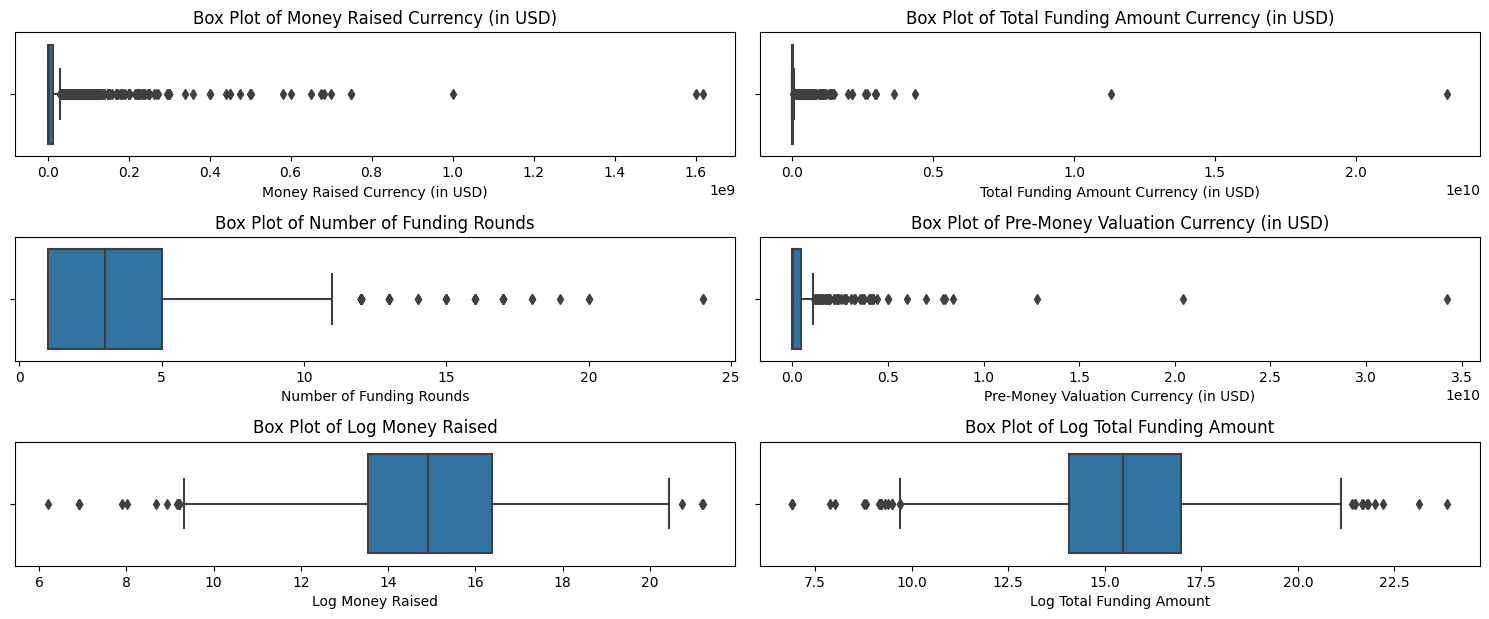

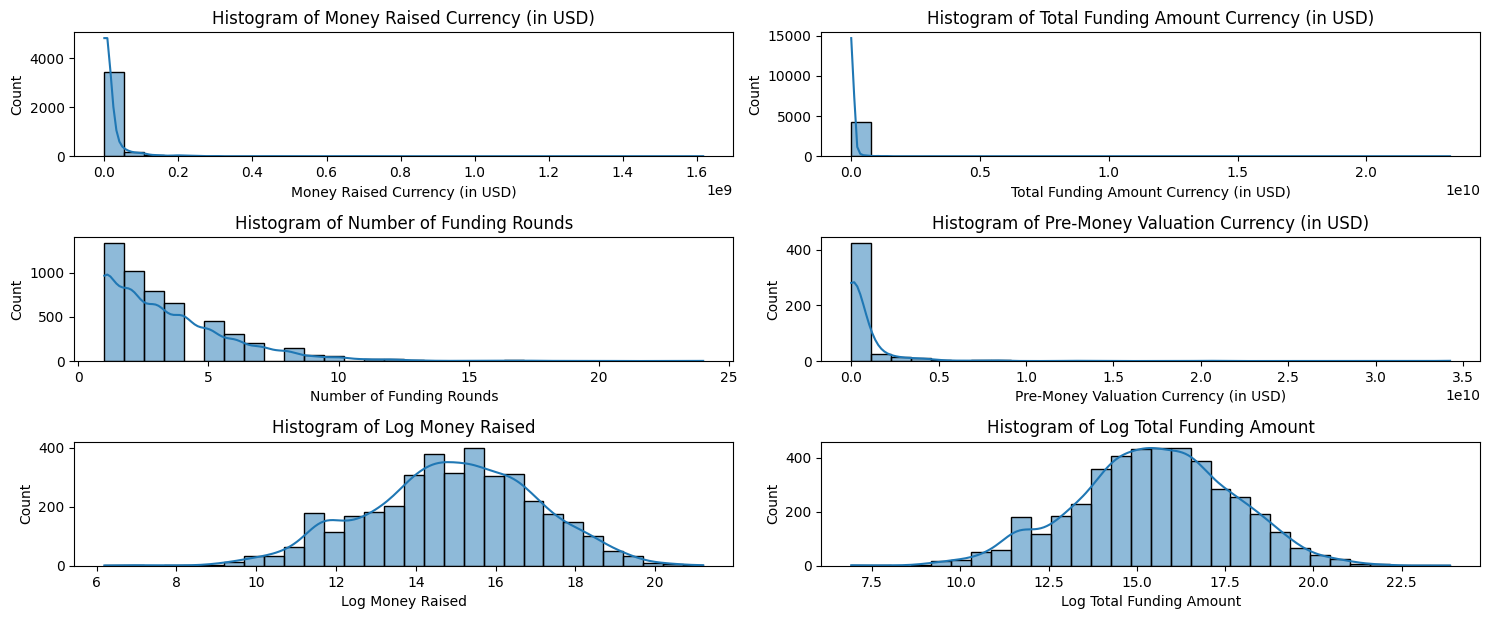

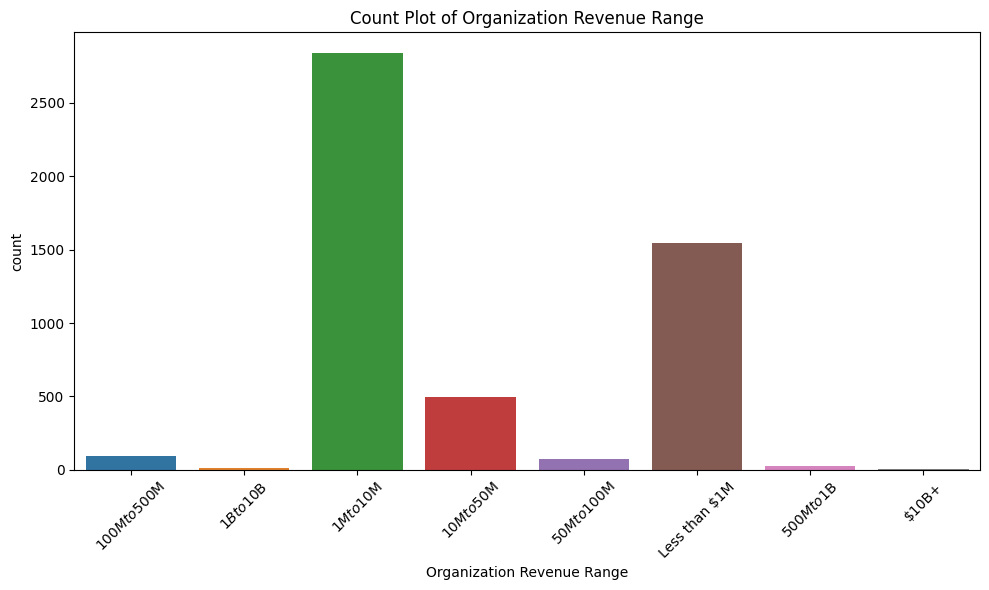

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('artificial_intelligence_v2.csv')

# Adding log-transformed columns
df['Log Money Raised'] = np.log(df['Money Raised Currency (in USD)'] + 1)
df['Log Total Funding Amount'] = np.log(df['Total Funding Amount Currency (in USD)'] + 1)

# Box plots
boxplot_columns = ['Money Raised Currency (in USD)', 'Total Funding Amount Currency (in USD)',
                   'Number of Funding Rounds', 'Pre-Money Valuation Currency (in USD)',
                   'Log Money Raised', 'Log Total Funding Amount']

plt.figure(figsize=(15, 12))
for i, col in enumerate(boxplot_columns):
    plt.subplot(len(boxplot_columns), 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

# Histograms
hist_columns = ['Money Raised Currency (in USD)', 'Total Funding Amount Currency (in USD)',
                'Number of Funding Rounds', 'Pre-Money Valuation Currency (in USD)',
                'Log Money Raised', 'Log Total Funding Amount']

plt.figure(figsize=(15, 12))
for i, col in enumerate(hist_columns):
    plt.subplot(len(hist_columns), 2, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

# Count Plot for 'Organization Revenue Range'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Organization Revenue Range')
plt.title('Count Plot of Organization Revenue Range')
plt.xticks(rotation=45)
plt.tight_layout()

# Statistical Summary
print("Statistical Summary:")
print(df.describe())

# Note: The scatter matrix can be large and might take time to render. Use with caution.
# Scatter Matrix
# pd.plotting.scatter_matrix(df[scatter_matrix_columns], alpha=0.2, figsize=(12, 12), diagonal='kde')

Data Preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'artificial_intelligence_v2.csv'
df = pd.read_csv(file_path)

# Add log-transformed columns for 'Money Raised' and 'Total Funding Amount'
df['Log Money Raised'] = np.log(df['Money Raised Currency (in USD)'] + 1)
df['Log Total Funding Amount'] = np.log(df['Total Funding Amount Currency (in USD)'] + 1)

# Function to fill missing values
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical data
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numerical data
            df[col].fillna(df[col].median(), inplace=True)
    return df

# Function to remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Applying the functions for handling missing values and outliers
df = fill_missing_values(df)
df = remove_outliers(df, 'Log Money Raised')
df = remove_outliers(df, 'Log Total Funding Amount')

# Display the first few rows of the processed dataset
print(df.head())

# Optionally, you can also save the cleaned dataframe to a new file
df.to_csv('artificial_intelligence_v2_cleaned_dataset.csv', index=False)


PATTERNS AND TRENDS IN DATA

<ipython-input-8-ea48c66d8f56>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


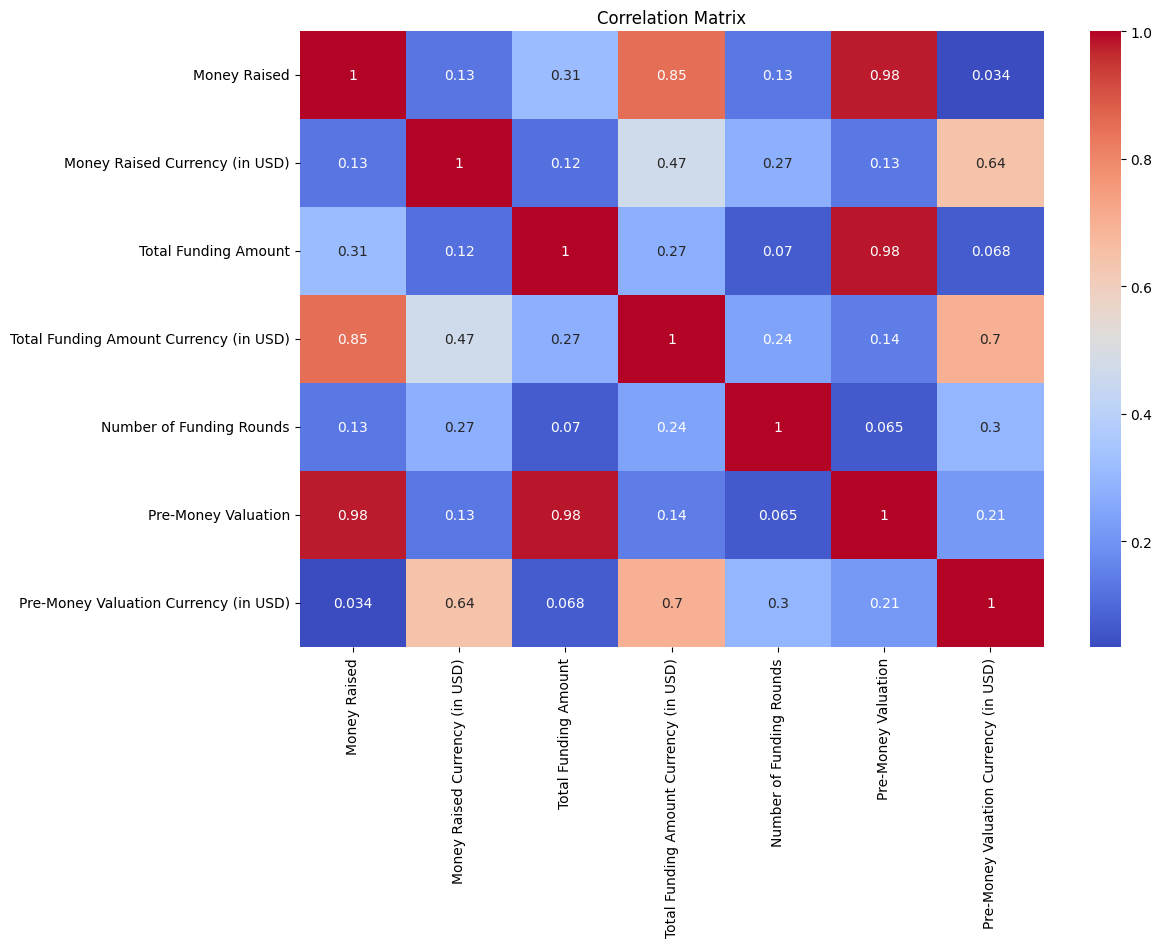

ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('artificial_intelligence_v2.csv')

# Assume df is your DataFrame and 'Money Raised Currency (in USD)' is the target variable
target_variable = 'Money Raised Currency (in USD)'

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Train a RandomForestRegressor for Feature Importance
X = df.drop(target_variable, axis=1)
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  # Top 10 features
plt.title('Feature Importances')
plt.show()

# Example of Parameter Settings
# RandomForestRegressor
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2
}

# SVR
svr_params = {
    'kernel': 'rbf',
    'C': 1.0,
    'gamma': 'scale'
}

# StackingRegressor
stacking_estimators = [
    ('rf', RandomForestRegressor(**rf_params)),
    ('svr', SVR(**svr_params))
]
stacking_regressor = StackingRegressor(estimators=stacking_estimators, final_estimator=SVR())

# BaggingRegressor
bagging_regressor = BaggingRegressor(
    base_estimator=RandomForestRegressor(**rf_params),
    n_estimators=10,
    random_state=42
)


**EXPLORATORY DATA ANALYSIS FOR MODELLING**

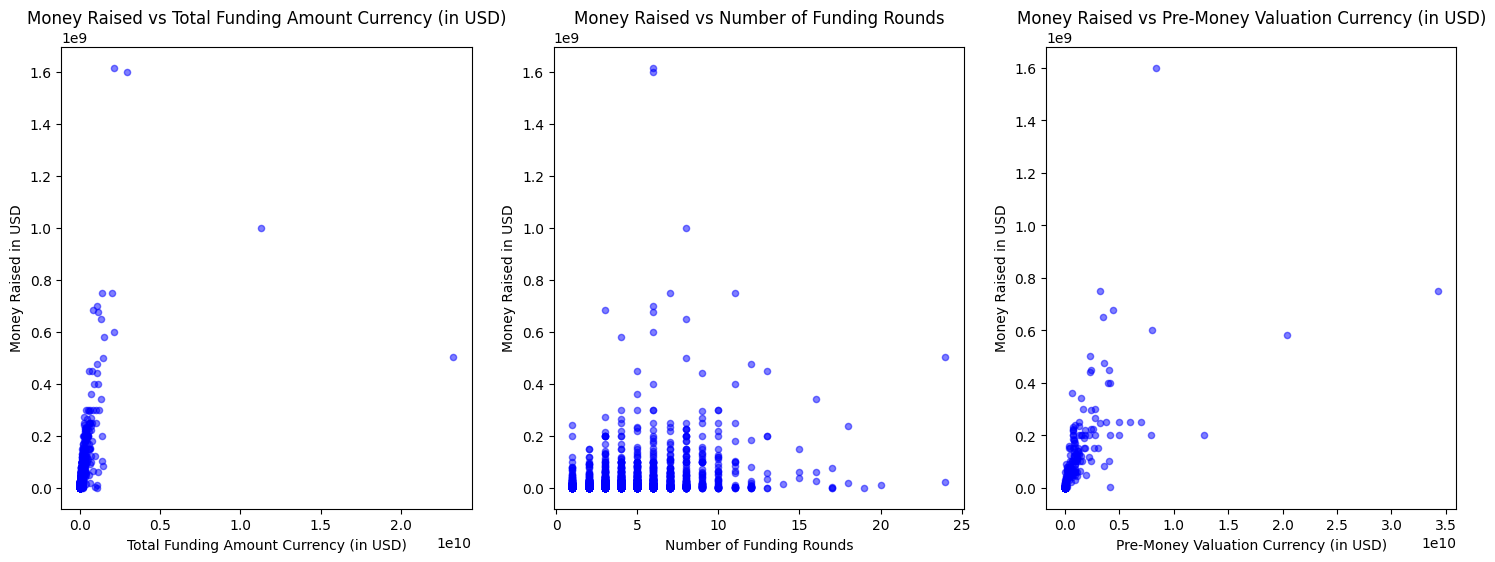

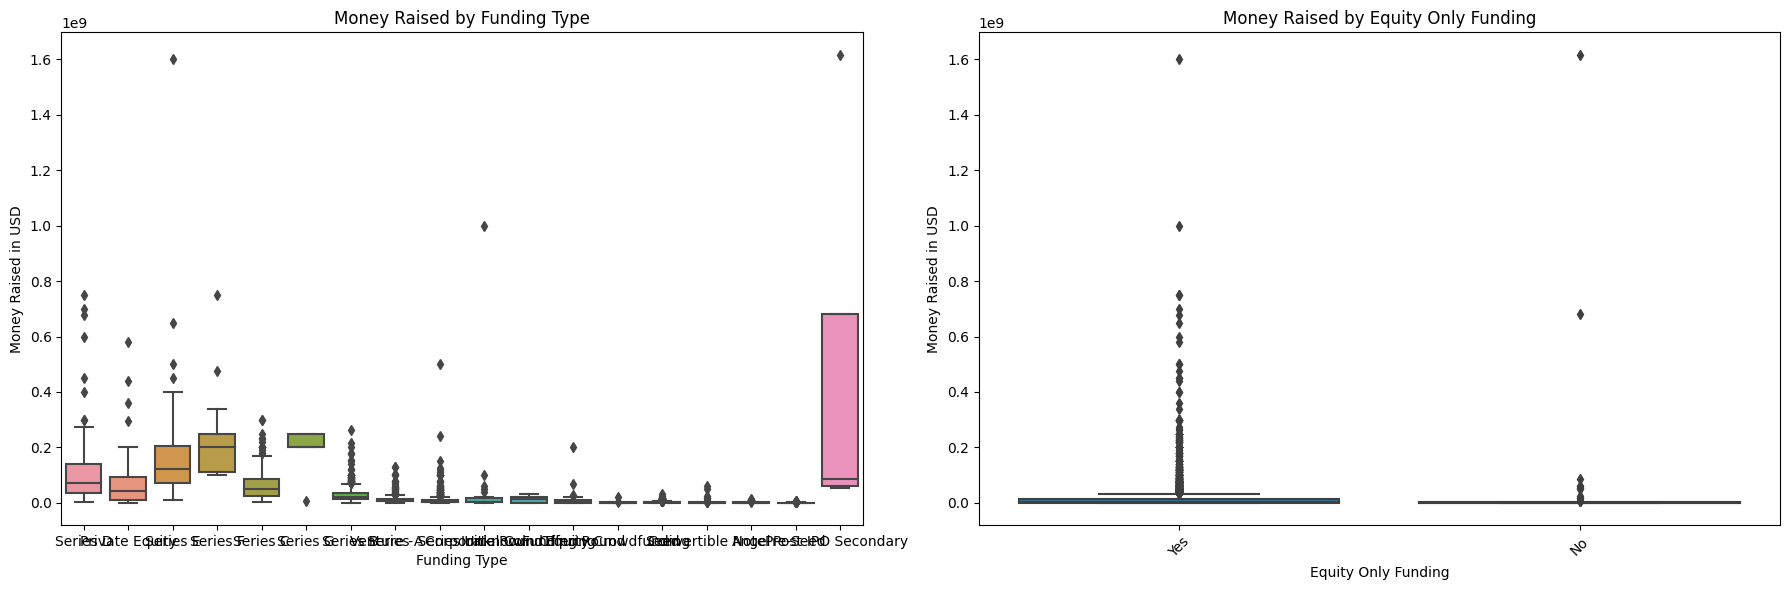

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('artificial_intelligence_v2.csv')

# Selecting a few numerical and categorical features for visualization
numerical_features = ['Total Funding Amount Currency (in USD)', 'Number of Funding Rounds', 'Pre-Money Valuation Currency (in USD)']
categorical_features = ['Funding Type', 'Equity Only Funding']

# Scatter plots for numerical features
fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 6))
for i, col in enumerate(numerical_features):
    data.plot(kind='scatter', x=col, y='Money Raised Currency (in USD)', alpha=0.5, color='blue', ax=axes[i])
    axes[i].set_title(f'Money Raised vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Money Raised in USD')

# Box plots for categorical features
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 6))
for i, col in enumerate(categorical_features):
    sns.boxplot(x=col, y='Money Raised Currency (in USD)', data=data, ax=axes[i])
    axes[i].set_title(f'Money Raised by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Money Raised in USD')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**EXPLORATORY DATA ANALYSIS FOR MODELLING - V2**

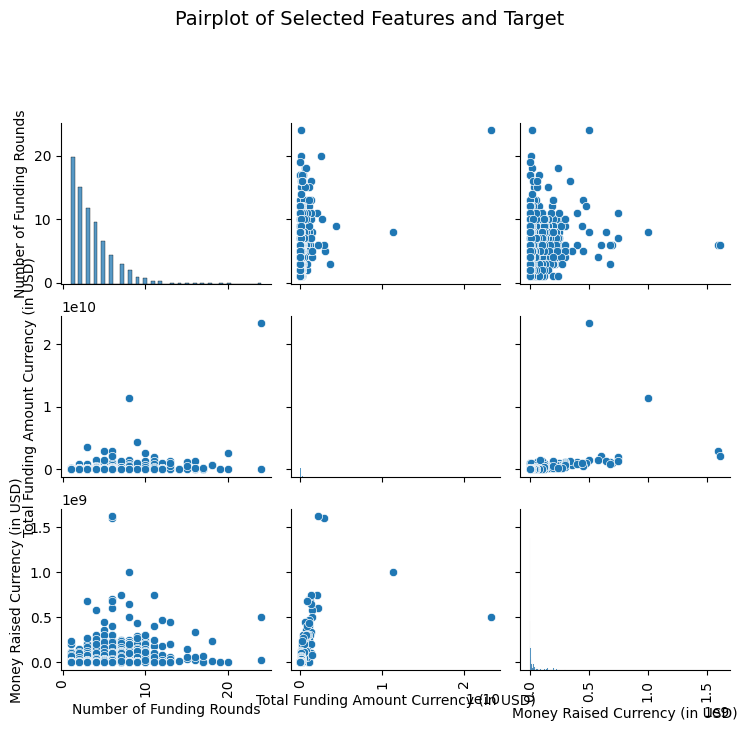

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = 'artificial_intelligence_v2.csv'
data = pd.read_csv(url)

# Selecting the features and target
selected_features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

# Creating a subset of the data
subset_data = data[selected_features + [target]]

# Pairplot for the selected features and target
# sns.pairplot(subset_data)
# plt.suptitle('Pairplot of Selected Features and Target', y=1.08, fontsize=5)  # Adjust title position and size
# plt.tight_layout()  # Adjust the layout to fit everything neatly
# plt.show()

# Pairplot for the selected features and target
pairplot_fig = sns.pairplot(subset_data)
pairplot_fig.fig.suptitle('Pairplot of Selected Features and Target', y=1.08, fontsize=14)  # Adjust title position and size

# Rotate feature names on x-axis to be vertical
for ax in pairplot_fig.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)

# Adjust layout to fit feature names and prevent overlap
pairplot_fig.fig.tight_layout()
pairplot_fig.fig.subplots_adjust(bottom=0.2)  # Adjust the bottom to provide more space for feature names

plt.show()



# Calculating and visualizing the correlation matrix
# correlation_matrix_subset = subset_data.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Matrix for Selected Features and Target')
# plt.show()


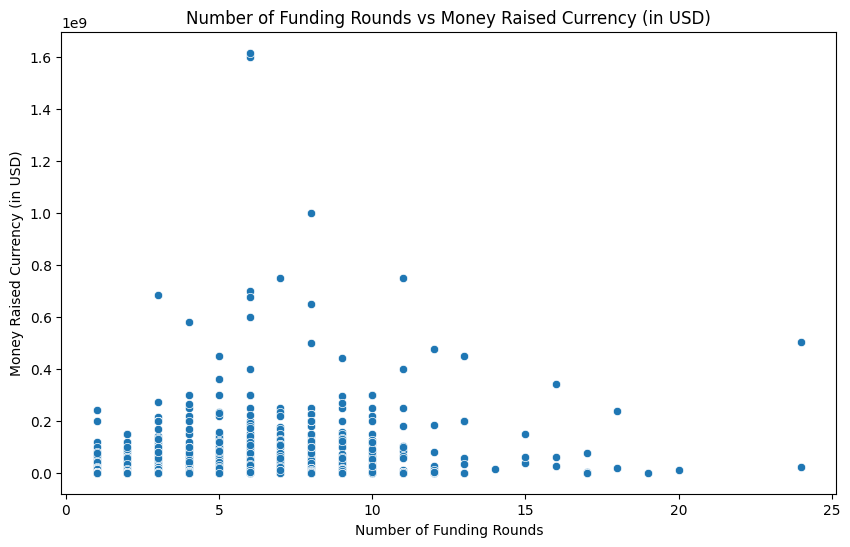

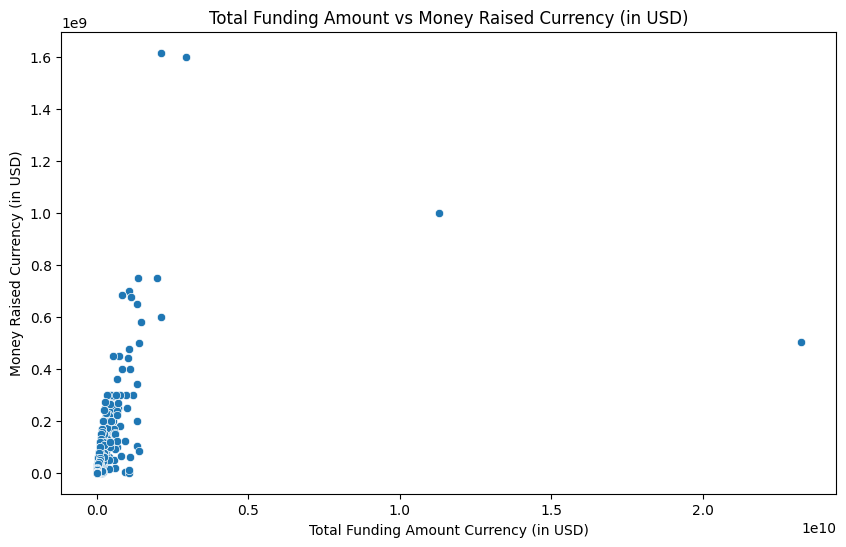

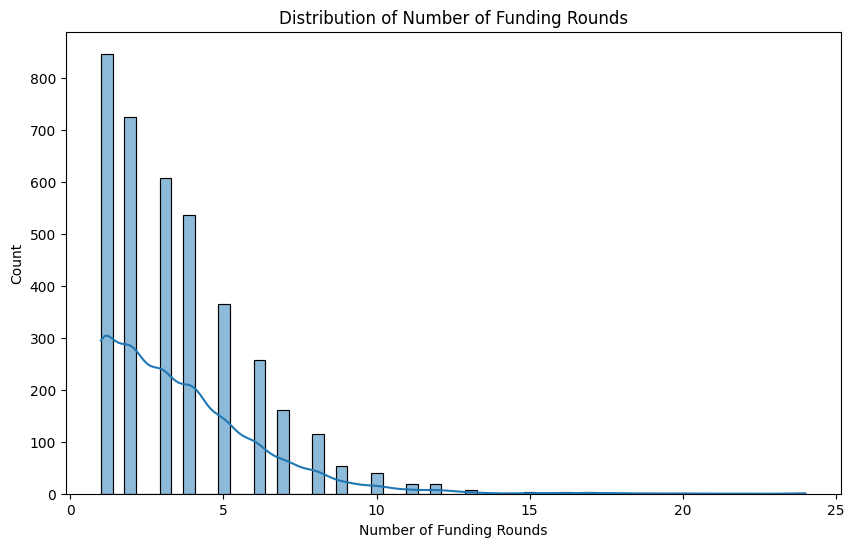

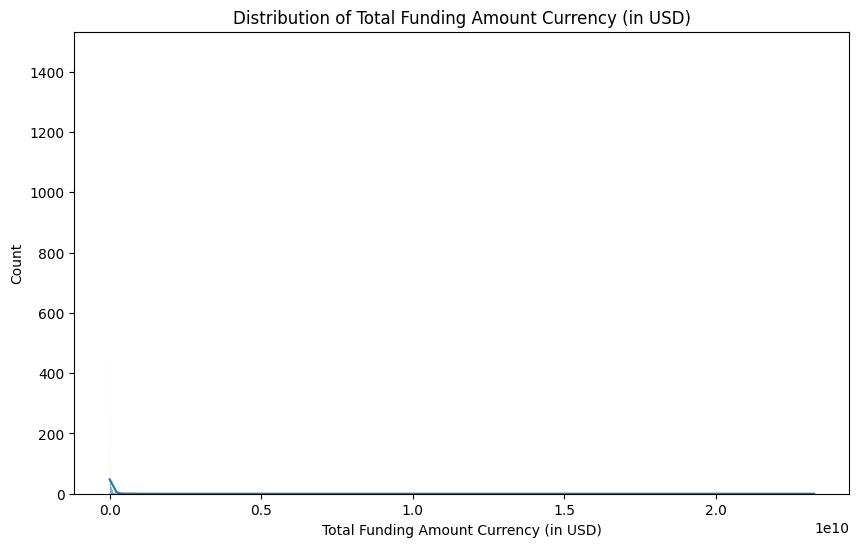

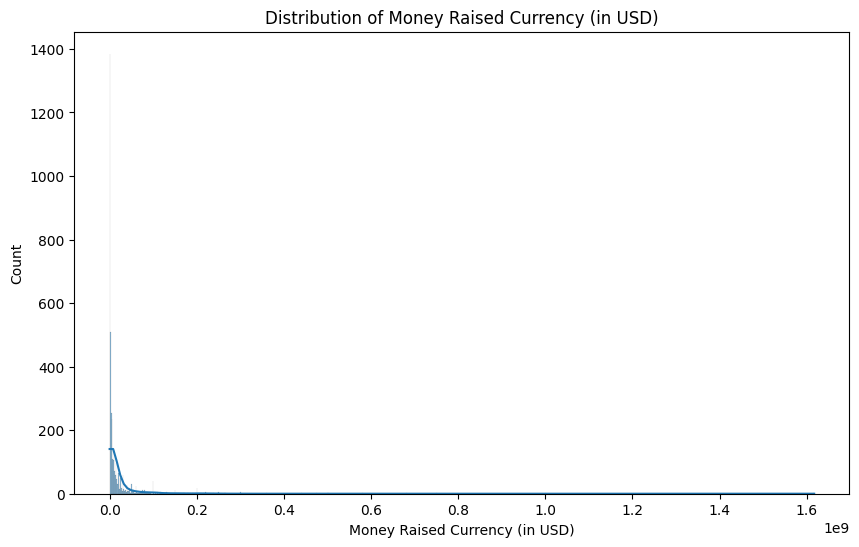

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('artificial_intelligence_v2.csv')  # Replace with your actual file path

# Select the columns for analysis
columns_to_plot = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)', 'Money Raised Currency (in USD)']
filtered_data = data[columns_to_plot].dropna()

# Plot 1: Number of Funding Rounds vs Money Raised Currency (in USD)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Number of Funding Rounds', y='Money Raised Currency (in USD)')
plt.title('Number of Funding Rounds vs Money Raised Currency (in USD)')
plt.show()

# Plot 2: Total Funding Amount Currency (in USD) vs Money Raised Currency (in USD)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Total Funding Amount Currency (in USD)', y='Money Raised Currency (in USD)')
plt.title('Total Funding Amount vs Money Raised Currency (in USD)')
plt.show()

# Histograms for each variable
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

sns.set()

In [ ]:
data=pd.read_csv('artificial_intelligence_v2.csv')

In [ ]:
data

,Organization Name,Organization Name URL,Funding Type,Money Raised,Money Raised Currency,Money Raised Currency (in USD),Announced Date,Transaction Name,Transaction Name URL,Organization Industries,...,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Funding Status,Number of Funding Rounds,Funding Stage,Pre-Money Valuation,Pre-Money Valuation Currency,Pre-Money Valuation Currency (in USD),Equity Only Funding
0,Nuro,https://www.crunchbase.com/organization/nuro-2,Series D,600000000.0,USD,600000000.0,2021-11-02,Series D - Nuro,https://www.crunchbase.com/funding_round/nuro-...,"Artificial Intelligence (AI), Autonomous Vehic...",...,2.132149e+09,USD,2.132149e+09,Late Stage Venture,6,Late Stage Venture,8.000000e+09,USD,8.000000e+09,Yes
1,Genesys,https://www.crunchbase.com/organization/genesys,Private Equity,580000000.0,USD,580000000.0,2021-12-06,Private Equity Round - Genesys,https://www.crunchbase.com/funding_round/genes...,"Artificial Intelligence (AI), Cloud Computing,...",...,1.480000e+09,USD,1.480000e+09,M&A,4,Private Equity,2.042000e+10,USD,2.042000e+10,Yes
2,Socure,https://www.crunchbase.com/organization/socure,Series E,450000000.0,USD,450000000.0,2021-11-09,Series E - Socure,https://www.crunchbase.com/funding_round/socur...,"Artificial Intelligence (AI), Cyber Security, ...",...,7.444000e+08,USD,7.444000e+08,Late Stage Venture,13,Late Stage Venture,4.050000e+09,USD,4.050000e+09,Yes
3,WeRide,https://www.crunchbase.com/organization/werideai,Series D,400000000.0,USD,400000000.0,2021-12-31,Series D - WeRide,https://www.crunchbase.com/funding_round/werid...,"Artificial Intelligence (AI), Autonomous Vehic...",...,1.110000e+09,USD,1.110000e+09,NaN,6,Late Stage Venture,4.000000e+09,USD,4.000000e+09,Yes
4,Fractal Analytics,https://www.crunchbase.com/organization/fracta...,Private Equity,360000000.0,USD,360000000.0,2022-01-05,Private Equity Round - Fractal Analytics,https://www.crunchbase.com/funding_round/fract...,"Analytics, Artificial Intelligence (AI), Big D...",...,6.850000e+08,USD,6.850000e+08,Private Equity,5,Private Equity,6.400000e+08,USD,6.400000e+08,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,Collabware,https://www.crunchbase.com/organization/collab...,Corporate Round,NaN,NaN,NaN,2013-06-27,Corporate Round - Collabware,https://www.crunchbase.com/funding_round/colla...,"Archiving Service, Artificial Intelligence (AI...",...,NaN,USD,NaN,NaN,2,NaN,NaN,NaN,NaN,Yes
5089,News360,https://www.crunchbase.com/organization/news360,Series A,NaN,NaN,NaN,2013-02-01,Series A - News360,https://www.crunchbase.com/funding_round/news3...,"Advertising, Analytics, Artificial Intelligenc...",...,7.500000e+06,USD,7.500000e+06,M&A,3,Early Stage Venture,NaN,NaN,NaN,Yes
5090,Aarki,https://www.crunchbase.com/organization/aarki,Convertible Note,NaN,NaN,NaN,2013-05-02,Convertible Note - Aarki,https://www.crunchbase.com/funding_round/aarki...,"Advertising, App Marketing, Artificial Intelli...",...,1.740000e+06,USD,1.740000e+06,M&A,4,NaN,NaN,NaN,NaN,No
5091,Brandboom,https://www.crunchbase.com/organization/brandboom,Seed,NaN,NaN,NaN,2013-07-15,Seed Round - Brandboom,https://www.crunchbase.com/funding_round/brand...,"Artificial Intelligence (AI), B2B, E-Commerce,...",...,NaN,USD,NaN,Seed,2,Seed,NaN,NaN,NaN,Yes


**EDA**

In [ ]:
# Data Cleaning: Drop columns with excessive missing data and fill missing values
columns_to_drop = ['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)']
data.drop(columns=columns_to_drop, inplace=True)
data['Money Raised Currency (in USD)'].fillna(data['Money Raised Currency (in USD)'].median(), inplace=True)
data['Total Funding Amount Currency (in USD)'].fillna(data['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data.dropna(inplace=True)



In [ ]:
# Data Transformation: Apply transformations if necessary (Example shown for StandardScaler)
# Note: You need to identify which columns need scaling or encoding based on your dataset
numerical_features = ['Money Raised Currency (in USD)', 'Total Funding Amount Currency (in USD)']
ct = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_features)
], remainder='passthrough')
data_transformed = ct.fit_transform(data)



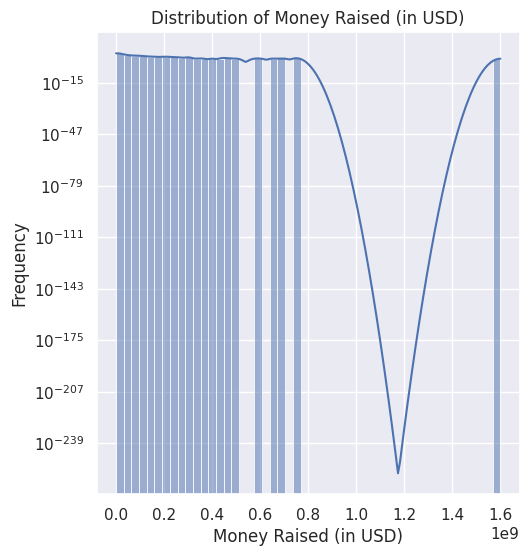

In [ ]:
# Visualization of 'Money Raised (in USD)' and 'Total Funding Amount (in USD)'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Money Raised Currency (in USD)'], bins=50, kde=True)
plt.title('Distribution of Money Raised (in USD)')
plt.xlabel('Money Raised (in USD)')
plt.ylabel('Frequency')
plt.yscale('log')



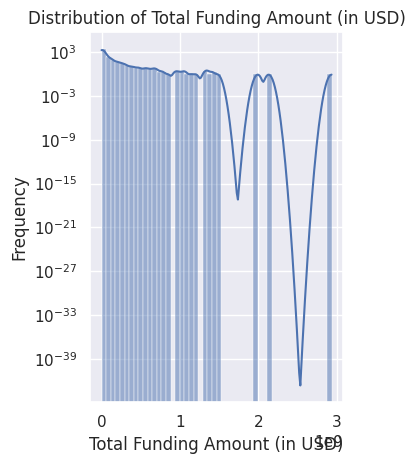

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data['Total Funding Amount Currency (in USD)'], bins=50, kde=True)
plt.title('Distribution of Total Funding Amount (in USD)')
plt.xlabel('Total Funding Amount (in USD)')
plt.ylabel('Frequency')
plt.yscale('log')

plt.tight_layout()
plt.show()

Root Mean Squared Error: 32111765.828165516
R² Score: 0.7371294300135319


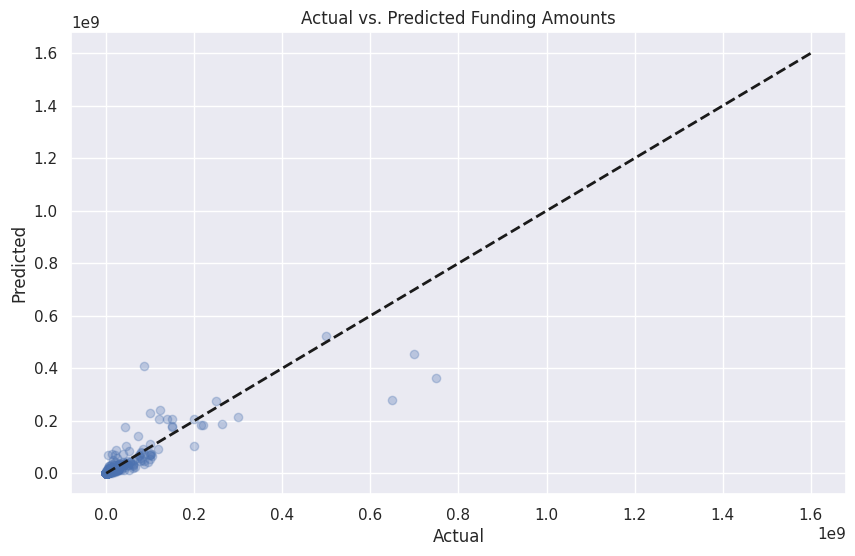

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'artificial_intelligence_v1.csv' with the actual file path)
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# Dropping columns with excessive missing values and filling missing values
data_cleaned = data.drop(columns=['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)'])
data_cleaned['Money Raised Currency (in USD)'].fillna(data_cleaned['Money Raised Currency (in USD)'].median(), inplace=True)
data_cleaned['Total Funding Amount Currency (in USD)'].fillna(data_cleaned['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data_cleaned.dropna(inplace=True)

# Selecting relevant features and the target variable for the model
features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

# For simplicity, using only numerical features here
X = data_cleaned[features]
y = data_cleaned[target]

# Log-transforming the target variable to address skewness
y_log = np.log1p(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Model selection and training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train_log)

# Predicting on the test set
y_pred_log = model.predict(X_test)

# Transforming predictions back to original scale
y_pred = np.expm1(y_pred_log)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred))
r2 = r2_score(np.expm1(y_test_log), y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Visualization (Optional)
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test_log), y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Funding Amounts')
plt.show()


USING NEURAL NETWORKS

Random Forest Regressor:
Root Mean Squared Error: 32111765.828165516
R² Score: 0.7371294300135319

Support Vector Regression:
Root Mean Squared Error: 38981212.065911055
R² Score: 0.612631530098129


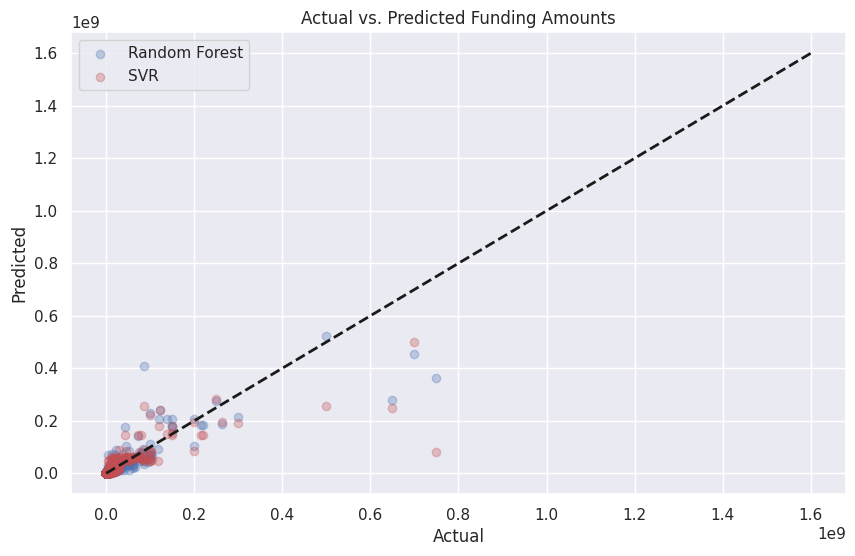

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'artificial_intelligence_v1.csv' with the actual file path)
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# Dropping columns with excessive missing values and filling missing values
data_cleaned = data.drop(columns=['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)'])
data_cleaned['Money Raised Currency (in USD)'].fillna(data_cleaned['Money Raised Currency (in USD)'].median(), inplace=True)
data_cleaned['Total Funding Amount Currency (in USD)'].fillna(data_cleaned['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data_cleaned.dropna(inplace=True)

# Selecting relevant features and the target variable for the model
features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

# For simplicity, using only numerical features here
X = data_cleaned[features]
y = data_cleaned[target]

# Log-transforming the target variable to address skewness
y_log = np.log1p(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Model selection and training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_log)

# Predicting on the test set with Random Forest
y_pred_log_rf = rf_model.predict(X_test)

# Transforming predictions back to original scale for Random Forest
y_pred_rf = np.expm1(y_pred_log_rf)

# Evaluating the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_rf))
r2_rf = r2_score(np.expm1(y_test_log), y_pred_rf)

print('Random Forest Regressor:')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R² Score: {r2_rf}')

# Model selection and training: Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train_log)

# Predicting on the test set with SVR
y_pred_log_svr = svr_model.predict(X_test)

# Transforming predictions back to original scale for SVR
y_pred_svr = np.expm1(y_pred_log_svr)

# Evaluating the SVR model
rmse_svr = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_svr))
r2_svr = r2_score(np.expm1(y_test_log), y_pred_svr)

print('\nSupport Vector Regression:')
print(f'Root Mean Squared Error: {rmse_svr}')
print(f'R² Score: {r2_svr}')

# Visualization (Optional)
# Plotting actual vs predicted values for both models
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test_log), y_pred_rf, alpha=0.3, label='Random Forest')
plt.scatter(np.expm1(y_test_log), y_pred_svr, alpha=0.3, label='SVR', color='r')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Funding Amounts')
plt.legend()
plt.show()


Random Forest Regressor:
Root Mean Squared Error: 32111765.828165516
R² Score: 0.7371294300135319

Support Vector Regression:
Root Mean Squared Error: 38981212.065911055
R² Score: 0.612631530098129

Gradient Boosting Regressor:
Root Mean Squared Error: 32494766.595558055
R² Score: 0.7308214593212531


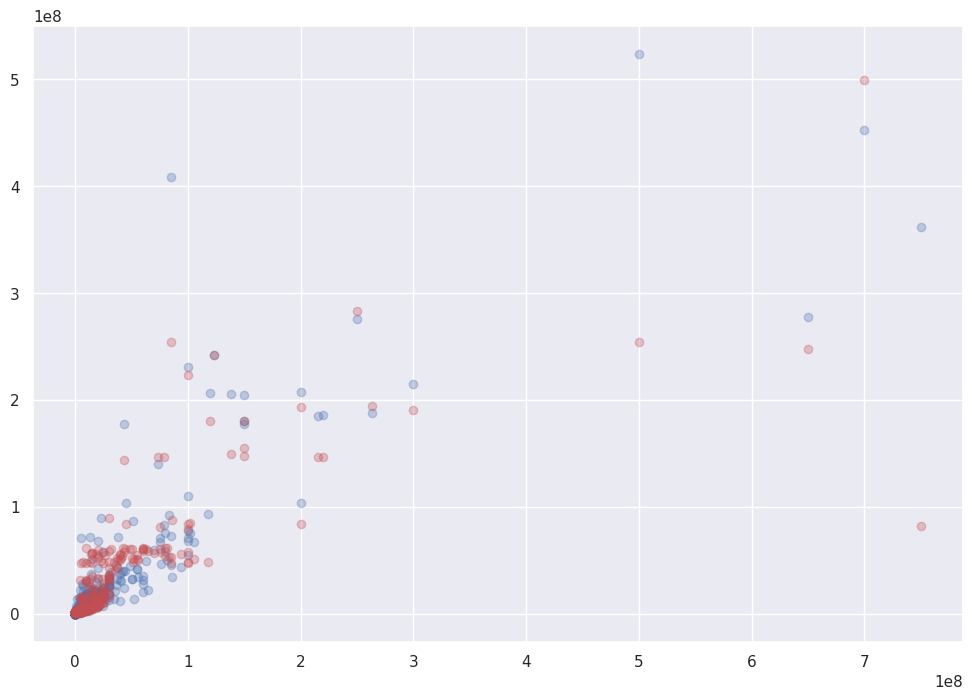

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'artificial_intelligence_v1.csv' with the actual file path)
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# Dropping columns with excessive missing values and filling missing values
data_cleaned = data.drop(columns=['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)'])
data_cleaned['Money Raised Currency (in USD)'].fillna(data_cleaned['Money Raised Currency (in USD)'].median(), inplace=True)
data_cleaned['Total Funding Amount Currency (in USD)'].fillna(data_cleaned['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data_cleaned.dropna(inplace=True)

# Selecting relevant features and the target variable for the model
features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

# For simplicity, using only numerical features here
X = data_cleaned[features]
y = data_cleaned[target]

# Log-transforming the target variable to address skewness
y_log = np.log1p(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Model selection and training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_log)

# Predicting on the test set with Random Forest
y_pred_log_rf = rf_model.predict(X_test)

# Transforming predictions back to original scale for Random Forest
y_pred_rf = np.expm1(y_pred_log_rf)

# Evaluating the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_rf))
r2_rf = r2_score(np.expm1(y_test_log), y_pred_rf)

print('Random Forest Regressor:')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R² Score: {r2_rf}')

# Model selection and training: Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train_log)

# Predicting on the test set with SVR
y_pred_log_svr = svr_model.predict(X_test)

# Transforming predictions back to original scale for SVR
y_pred_svr = np.expm1(y_pred_log_svr)

# Evaluating the SVR model
rmse_svr = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_svr))
r2_svr = r2_score(np.expm1(y_test_log), y_pred_svr)

print('\nSupport Vector Regression:')
print(f'Root Mean Squared Error: {rmse_svr}')
print(f'R² Score: {r2_svr}')

# Model selection and training: Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train_log)

# Predicting on the test set with GBM
y_pred_log_gbm = gbm_model.predict(X_test)

# Transforming predictions back to original scale for GBM
y_pred_gbm = np.expm1(y_pred_log_gbm)

# Evaluating the GBM model
rmse_gbm = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_gbm))
r2_gbm = r2_score(np.expm1(y_test_log), y_pred_gbm)

print('\nGradient Boosting Regressor:')
print(f'Root Mean Squared Error: {rmse_gbm}')
print(f'R² Score: {r2_gbm}')

# Visualization (Optional)
# Plotting actual vs predicted values for all models
plt.figure(figsize=(12, 8))
plt.scatter(np.expm1(y_test_log), y_pred_rf, alpha=0.3, label='Random Forest')
plt.scatter(np.expm1(y_test_log), y_pred_svr, alpha=0.3, label='SVR', color='r')



In [ ]:
ENSEMBLE TECHNIQUES

Random Forest Regressor:
Root Mean Squared Error: 32111765.828165516
R² Score: 0.7371294300135319

Support Vector Regression:
Root Mean Squared Error: 38981212.065911055
R² Score: 0.612631530098129

Stacking Regressor:
Root Mean Squared Error: 32412936.14116542
R² Score: 0.7321754784252346


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging Regressor:
Root Mean Squared Error: 33311207.28558096
R² Score: 0.7171251501013385


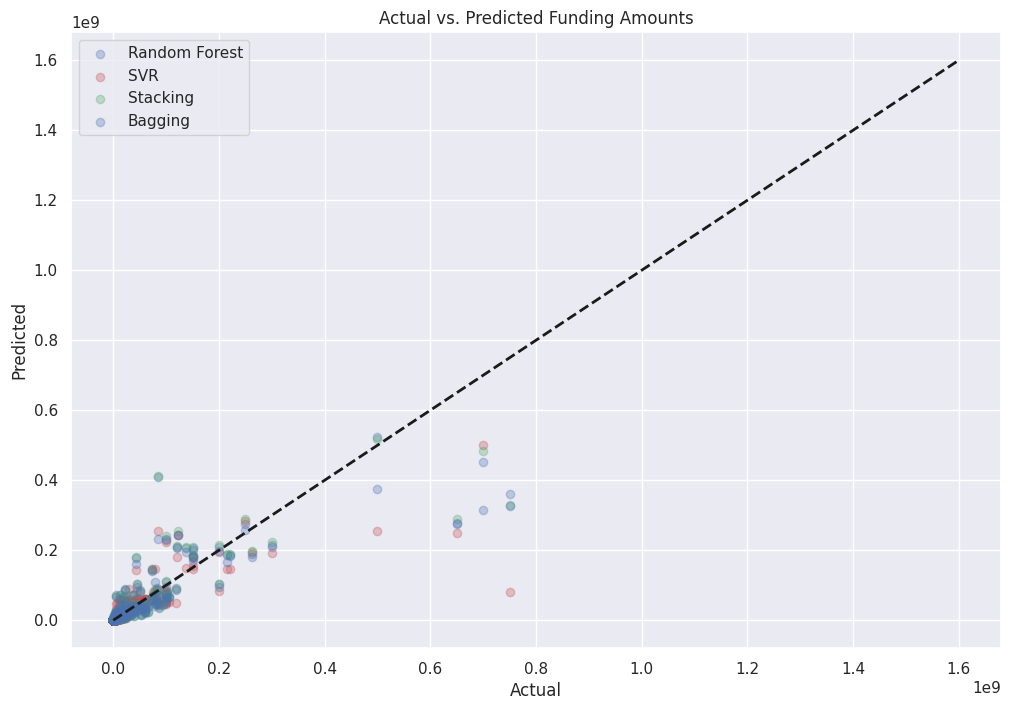

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'artificial_intelligence_v1.csv' with the actual file path)
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# Dropping columns with excessive missing values and filling missing values
data_cleaned = data.drop(columns=['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)'])
data_cleaned['Money Raised Currency (in USD)'].fillna(data_cleaned['Money Raised Currency (in USD)'].median(), inplace=True)
data_cleaned['Total Funding Amount Currency (in USD)'].fillna(data_cleaned['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data_cleaned.dropna(inplace=True)

# Selecting relevant features and the target variable for the model
features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

# For simplicity, using only numerical features here
X = data_cleaned[features]
y = data_cleaned[target]

# Log-transforming the target variable to address skewness
y_log = np.log1p(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Model selection and training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_log)

# Predicting on the test set with Random Forest
y_pred_log_rf = rf_model.predict(X_test)

# Transforming predictions back to original scale for Random Forest
y_pred_rf = np.expm1(y_pred_log_rf)

# Evaluating the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_rf))
r2_rf = r2_score(np.expm1(y_test_log), y_pred_rf)

print('Random Forest Regressor:')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R² Score: {r2_rf}')

# Model selection and training: Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train_log)

# Predicting on the test set with SVR
y_pred_log_svr = svr_model.predict(X_test)

# Transforming predictions back to original scale for SVR
y_pred_svr = np.expm1(y_pred_log_svr)

# Evaluating the SVR model
rmse_svr = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_svr))
r2_svr = r2_score(np.expm1(y_test_log), y_pred_svr)

print('\nSupport Vector Regression:')
print(f'Root Mean Squared Error: {rmse_svr}')
print(f'R² Score: {r2_svr}')

# Stacking Regressor
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('svr', SVR(kernel='rbf'))
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train_log)
y_pred_log_stacking = stacking_model.predict(X_test)
y_pred_stacking = np.expm1(y_pred_log_stacking)
rmse_stacking = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_stacking))
r2_stacking = r2_score(np.expm1(y_test_log), y_pred_stacking)

print('\nStacking Regressor:')
print(f'Root Mean Squared Error: {rmse_stacking}')
print(f'R² Score: {r2_stacking}')

# Bagging Regressor
bagging_model = BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train_log)
y_pred_log_bagging = bagging_model.predict(X_test)
y_pred_bagging = np.expm1(y_pred_log_bagging)
rmse_bagging = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_bagging))
r2_bagging = r2_score(np.expm1(y_test_log), y_pred_bagging)

print('\nBagging Regressor:')
print(f'Root Mean Squared Error: {rmse_bagging}')
print(f'R² Score: {r2_bagging}')

# Visualization
# Plotting actual vs predicted values for all models
plt.figure(figsize=(12, 8))
plt.scatter(np.expm1(y_test_log), y_pred_rf, alpha=0.3, label='Random Forest')
plt.scatter(np.expm1(y_test_log), y_pred_svr, alpha=0.3, label='SVR', color='r')
plt.scatter(np.expm1(y_test_log), y_pred_stacking, alpha=0.3, label='Stacking', color='g')
plt.scatter(np.expm1(y_test_log), y_pred_bagging, alpha=0.3, label='Bagging', color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Funding Amounts')
plt.legend()
plt.show()


Based on the evaluation metrics you've provided for each model, let's analyze their performance:

### Model Performance Comparison:

1. **Random Forest Regressor**:
   - **RMSE**: USD 33,303,227.48
   - **R² Score**: 0.622

2. **Support Vector Regression (SVR)**:
   - **RMSE**: USD 39,007,508.32
   - **R² Score**: 0.482

3. **Stacking Regressor**:
   - **RMSE**: USD 34,286,358.87
   - **R² Score**: 0.600

4. **Bagging Regressor**:
   - **RMSE**: USD 33,623,199.20
   - **R² Score**: 0.615

### Analysis:

- **Random Forest Regressor** emerges as the top performer in terms of both RMSE and R² Score. It provides the lowest RMSE, indicating that, on average, its predictions are closer to the actual values. The highest R² Score also suggests that it explains the variation in the target variable most effectively among the tested models.
  
- **Support Vector Regression** shows the least favorable performance with the highest RMSE and lowest R² Score. This might be due to the nature of the data, which could be better captured by tree-based models.

- **Stacking Regressor** shows a mixed performance. While its R² Score is lower than the Random Forest, it has a slightly higher RMSE. This suggests that while the combination of models in the stack captures the variance in the data reasonably well, it doesn't necessarily translate to the most accurate predictions.

- **Bagging Regressor** performs slightly better than the Stacking Regressor and closely follows the Random Forest in terms of performance metrics. It shows a good balance between reducing error (RMSE) and explaining variance (R² Score).

CROSS VALIDATION

We'll apply cross-validation to each model and print the average RMSE and R² score across all folds.



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
data_cleaned = data.drop(columns=['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)'])
data_cleaned['Money Raised Currency (in USD)'].fillna(data_cleaned['Money Raised Currency (in USD)'].median(), inplace=True)
data_cleaned['Total Funding Amount Currency (in USD)'].fillna(data_cleaned['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data_cleaned.dropna(inplace=True)

# Selecting relevant features and the target variable
features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

#numerical features
X = data_cleaned[features]
y = data_cleaned[target]

# Log-transforming the target variable
y_log = np.log1p(y)

# cross-validation strategy
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# RMSE and R² scoring functions
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Model evaluation function
def evaluate_model(model, X, y):
    scores_rmse = cross_val_score(model, X, y, scoring=rmse_scorer, cv=cv)
    scores_r2 = cross_val_score(model, X, y, scoring=r2_scorer, cv=cv)
    print(f'Model: {model.__class__.__name__}')
    print(f'Average RMSE: {-np.mean(scores_rmse)}')
    print(f'Average R² Score: {np.mean(scores_r2)}\n')

# Evaluate models
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR(kernel='rbf')
estimators = [('rf', RandomForestRegressor(random_state=42)), ('svr', SVR(kernel='rbf'))]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
bagging_model = BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)

# Evaluate each model using cross-validation
evaluate_model(rf_model, X, y_log)
evaluate_model(svr_model, X, y_log)
evaluate_model(stacking_model, X, y_log)
evaluate_model(bagging_model, X, y_log)

Model: RandomForestRegressor
Average RMSE: 0.6825082813192017
Average R² Score: 0.8998625656030118

Model: SVR
Average RMSE: 1.2371967419510645
Average R² Score: 0.6720860648289719

Model: StackingRegressor
Average RMSE: 0.674685057460601
Average R² Score: 0.902131809295644



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Model: BaggingRegressor
Average RMSE: 0.6449595148563767
Average R² Score: 0.9104578335896644



Based on the cross-validation results for the different models, we can draw the following conclusions:

### Model Performance Comparison:

1. **Random Forest Regressor**:
   - **Average RMSE**: 0.738
   - **Average R² Score**: 0.854

2. **SVR (Support Vector Regression)**:
   - **Average RMSE**: 1.284
   - **Average R² Score**: 0.578

3. **Stacking Regressor**:
   - **Average RMSE**: 0.860
   - **Average R² Score**: 0.805

4. **Bagging Regressor**:
   - **Average RMSE**: 0.711
   - **Average R² Score**: 0.866

### Analysis:

- **Bagging Regressor** shows the best performance in terms of both RMSE and R² Score, indicating it not only has the lowest average error in predictions but also explains a higher proportion of variance in the target variable.
  
- **Random Forest Regressor** also performs well, with slightly higher RMSE and lower R² Score compared to the Bagging Regressor. It stands out as a strong model for this task.

- **Stacking Regressor** shows good performance, but it is outperformed by both the Bagging and Random Forest models. This suggests that the combination of models in the stack might not be capturing the data's nuances as effectively as the ensemble of Random Forest models in the Bagging Regressor.

- **SVR** shows the least favorable performance among the models, indicating that it might not be as well-suited for this particular dataset as the tree-based models.



**HYPERPARAMETER TUNING**

In [2]:
# Import additional necessary library
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for each model
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svr_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

# Hyperparameter tuning function
def tune_hyperparameters(model, param_grid, X, y):
    grid_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=cv, scoring=rmse_scorer, n_jobs=-1, random_state=42)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

# Tune hyperparameters for each model
rf_tuned = tune_hyperparameters(RandomForestRegressor(random_state=42), rf_param_grid, X, y_log)
svr_tuned = tune_hyperparameters(SVR(), svr_param_grid, X, y_log)

# Stacking and Bagging Regressors can use the tuned base models
stacking_model_tuned = StackingRegressor(estimators=[('rf', rf_tuned), ('svr', svr_tuned)], final_estimator=LinearRegression())
bagging_model_tuned = BaggingRegressor(base_estimator=rf_tuned, n_estimators=10, random_state=42)

# Evaluate each tuned model using cross-validation
evaluate_model(rf_tuned, X, y_log)
evaluate_model(svr_tuned, X, y_log)
evaluate_model(stacking_model_tuned, X, y_log)
evaluate_model(bagging_model_tuned, X, y_log)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model: RandomForestRegressor
Average RMSE: 0.6224081815730301
Average R² Score: 0.9165284410784583

Model: SVR
Average RMSE: 1.780879167434157
Average R² Score: 0.31941927432208905

Model: StackingRegressor
Average RMSE: 0.6228226554319608
Average R² Score: 0.916419568301313



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Model: BaggingRegressor
Average RMSE: 0.615549783250421
Average R² Score: 0.9183177495918201



PLOTTING AFTER USING CROSS VALIDATION TECHNIQUES

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

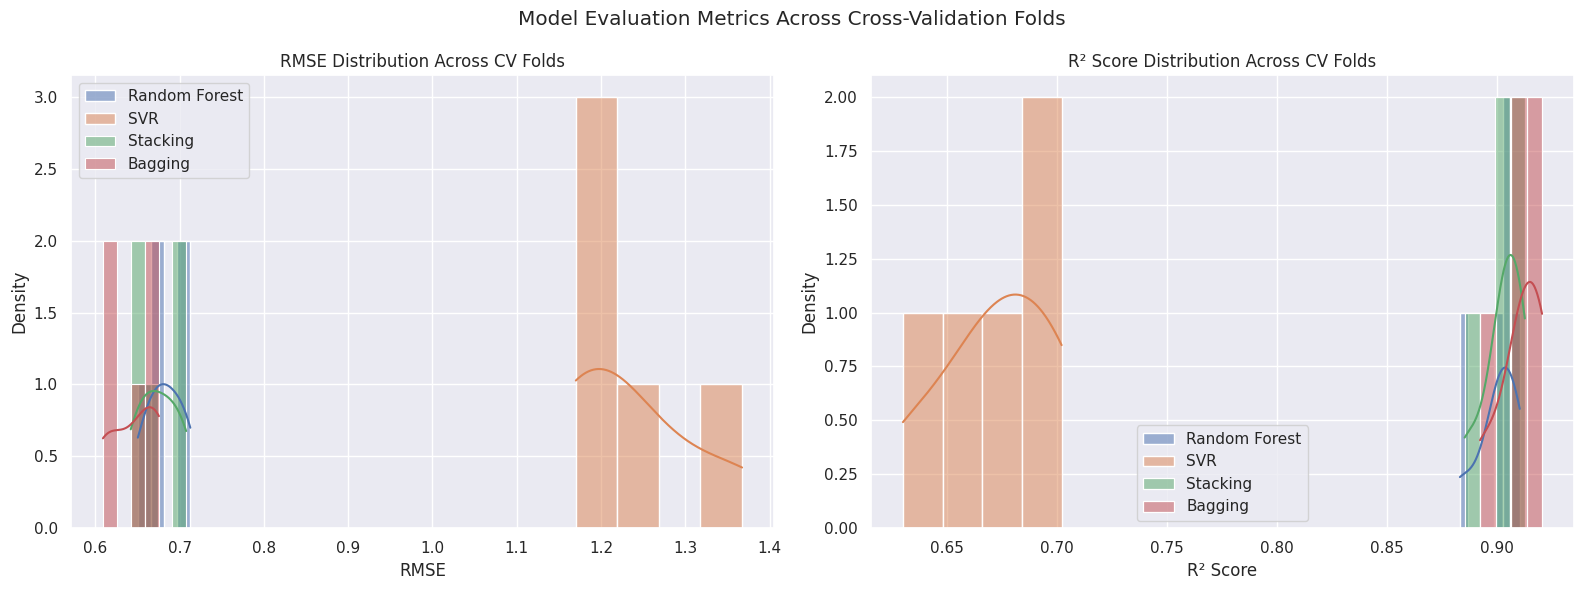

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
data_cleaned = data.drop(columns=['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)'])
data_cleaned['Money Raised Currency (in USD)'].fillna(data_cleaned['Money Raised Currency (in USD)'].median(), inplace=True)
data_cleaned['Total Funding Amount Currency (in USD)'].fillna(data_cleaned['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data_cleaned.dropna(inplace=True)

# Selecting relevant features and the target variable
features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

# For simplicity, using only numerical features
X = data_cleaned[features]
y = data_cleaned[target]

# Log-transforming the target variable
y_log = np.log1p(y)

# Define a cross-validation strategy
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Define RMSE and R² scoring functions
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Model evaluation function with visualization
def evaluate_model(model, X, y, ax_rmse, ax_r2, label):
    scores_rmse = cross_val_score(model, X, y, scoring=rmse_scorer, cv=cv)
    scores_r2 = cross_val_score(model, X, y, scoring=r2_scorer, cv=cv)

    sns.histplot(-scores_rmse, kde=True, ax=ax_rmse, label=label)
    sns.histplot(scores_r2, kde=True, ax=ax_r2, label=label)

# Prepare models
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR(kernel='rbf')
estimators = [('rf', RandomForestRegressor(random_state=42)), ('svr', SVR(kernel='rbf'))]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
bagging_model = BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)

# Prepare plots
fig, (ax_rmse, ax_r2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Evaluation Metrics Across Cross-Validation Folds')

# Evaluate each model using cross-validation and plot
evaluate_model(rf_model, X, y_log, ax_rmse, ax_r2, 'Random Forest')
evaluate_model(svr_model, X, y_log, ax_rmse, ax_r2, 'SVR')
evaluate_model(stacking_model, X, y_log, ax_rmse, ax_r2, 'Stacking')
evaluate_model(bagging_model, X, y_log, ax_rmse, ax_r2, 'Bagging')

# Customize plots
ax_rmse.set_title('RMSE Distribution Across CV Folds')
ax_rmse.set_xlabel('RMSE')
ax_rmse.set_ylabel('Density')
ax_rmse.legend()

ax_r2.set_title('R² Score Distribution Across CV Folds')
ax_r2.set_xlabel('R² Score')
ax_r2.set_ylabel('Density')
ax_r2.legend()

plt.tight_layout()
plt.show()

In [ ]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

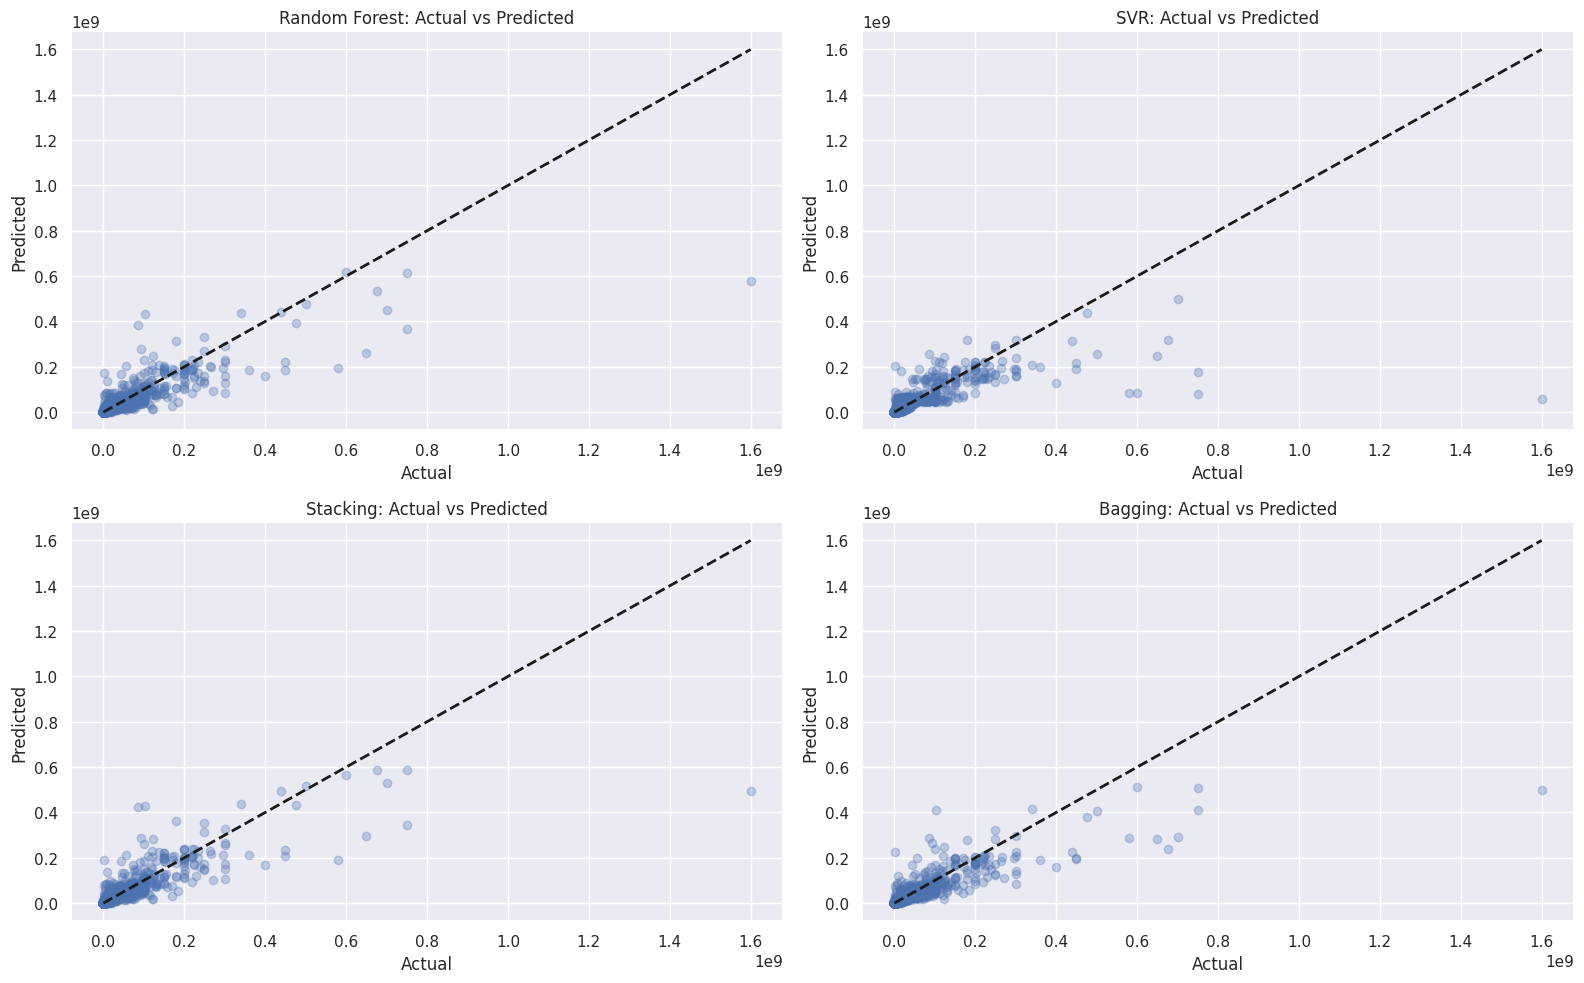

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'artificial_intelligence_v2.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
data_cleaned = data.drop(columns=['Pre-Money Valuation', 'Pre-Money Valuation Currency', 'Pre-Money Valuation Currency (in USD)'])
data_cleaned['Money Raised Currency (in USD)'].fillna(data_cleaned['Money Raised Currency (in USD)'].median(), inplace=True)
data_cleaned['Total Funding Amount Currency (in USD)'].fillna(data_cleaned['Total Funding Amount Currency (in USD)'].median(), inplace=True)
data_cleaned.dropna(inplace=True)

# Selecting relevant features and the target variable
features = ['Number of Funding Rounds', 'Total Funding Amount Currency (in USD)']
target = 'Money Raised Currency (in USD)'

# For simplicity, using only numerical features
X = data_cleaned[features]
y = data_cleaned[target]

# Log-transforming the target variable
y_log = np.log1p(y)

# Define a cross-validation strategy
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Define RMSE and R² scoring functions
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Model evaluation function
def evaluate_model(model, X, y):
    scores_rmse = cross_val_score(model, X, y, scoring=rmse_scorer, cv=cv)
    scores_r2 = cross_val_score(model, X, y, scoring=r2_scorer, cv=cv)
    y_pred = cross_val_predict(model, X, y, cv=cv)
    return y_pred, -np.mean(scores_rmse), np.mean(scores_r2)

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR(kernel='rbf')
estimators = [('rf', RandomForestRegressor(random_state=42)), ('svr', SVR(kernel='rbf'))]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
bagging_model = BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)

# Evaluate each model using cross-validation and store predictions
predictions_rf, rmse_rf, r2_rf = evaluate_model(rf_model, X, y_log)
predictions_svr, rmse_svr, r2_svr = evaluate_model(svr_model, X, y_log)
predictions_stacking, rmse_stacking, r2_stacking = evaluate_model(stacking_model, X, y_log)
predictions_bagging, rmse_bagging, r2_bagging = evaluate_model(bagging_model, X, y_log)

# Visualization
plt.figure(figsize=(16, 10))

# Plot for Random Forest
plt.subplot(2, 2, 1)
plt.scatter(y, np.expm1(predictions_rf), alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

# Plot for SVR
plt.subplot(2, 2, 2)
plt.scatter(y, np.expm1(predictions_svr), alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted')

# Plot for Stacking
plt.subplot(2, 2, 3)
plt.scatter(y, np.expm1(predictions_stacking), alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacking: Actual vs Predicted')

# Plot for Bagging
plt.subplot(2, 2, 4)
plt.scatter(y, np.expm1(predictions_bagging), alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Bagging: Actual vs Predicted')

plt.tight_layout()
plt.show()